In [3]:
from rqalpha.api import *

# 在这个方法中编写任何的初始化逻辑。context对象将会在你的算法策略的任何方法之间做传递。
def init(context):
    logger.info("init")

def before_trading(context):
    pass

# 你选择的证券的数据更新将会触发此段逻辑，例如日或分钟历史数据切片或者是实时数据切片更新
def handle_bar(context, bar_dict):
    _preDt = context.prev_trading_dt
    _fvalue = get_factors("pe",_preDt.date(),_preDt.date()).iloc[0]
    _fvalue = _fvalue[_fvalue>0]
#     print(context.now,_fvalue.sort_values())
    #买入低估值排名前10的票
    buy_codes = list(_fvalue.sort_values().index[:10])
#     holdings = [code for code in context.portfolio.positions]
    print(buy_codes)
    # equalWeight_order(buy_codes,context)

2017-01-03 INFO init
2017-01-03 INFO 000001.XSHE       6.7407
000002.XSHE       9.5646
000004.XSHE      48.2571
000005.XSHE      26.5261
000006.XSHE      11.4471
000007.XSHE      42.4395
000008.XSHE      30.5768
000009.XSHE     -79.2387
000010.XSHE     137.9092
000011.XSHE      20.9009
000012.XSHE      22.2610
000014.XSHE    1003.7368
000016.XSHE       7.5821
000017.XSHE    1321.2224
000018.XSHE      29.6576
000019.XSHE      32.2956
000020.XSHE     420.9129
000021.XSHE      56.7905
000022.XSHE      23.2090
000023.XSHE    -644.1486
000025.XSHE    1425.9790
000026.XSHE      60.6876
000027.XSHE      30.3558
000028.XSHE      16.9075
000029.XSHE      35.0933
000030.XSHE      13.1728
000031.XSHE      20.6855
000032.XSHE      94.0107
000033.XSHE     -58.4716
000034.XSHE      18.5765
                 ...    
603936.XSHG     117.3741
603937.XSHG          NaN
603938.XSHG          NaN
603939.XSHG      39.6121
603955.XSHG          NaN
603958.XSHG     157.8029
603959.XSHG      47.7746
603960.XSHG  

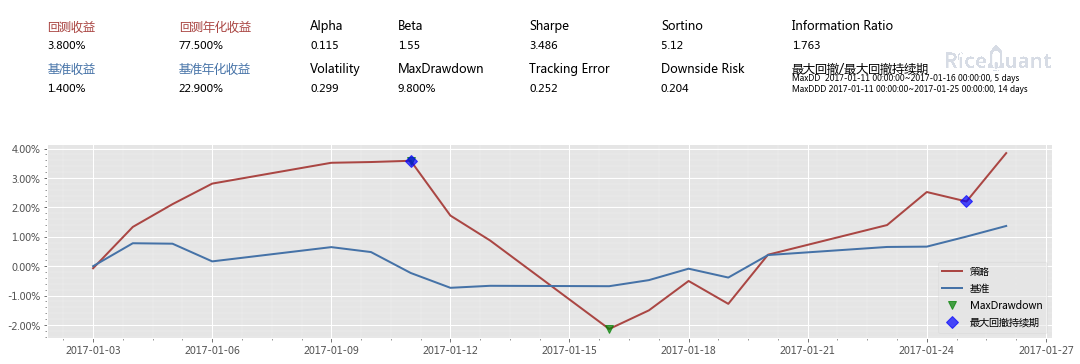

{'sys_analyser': {'benchmark_portfolio':               cash  market_value  static_unit_net_value  total_value  \
  date                                                                   
  2017-01-03  673.23     999326.77                  1.000   1000000.00   
  2017-01-04  673.23    1007124.69                  0.992   1007797.92   
  2017-01-05  673.23    1006969.21                  1.000   1007642.44   
  2017-01-06  673.23    1000953.33                  1.008   1001626.56   
  2017-01-09  673.23    1005806.10                  1.007   1006479.33   
  2017-01-10  673.23    1004122.73                  1.001   1004795.96   
  2017-01-11  673.23     997015.50                  1.006    997688.73   
  2017-01-12  673.23     991968.38                  1.004    992641.61   
  2017-01-13  673.23     992653.09                  0.997    993326.32   
  2017-01-16  673.23     992515.55                  0.993    993188.78   
  2017-01-17  673.23     994581.64                  0.992    995254.87   

In [4]:
from rqalpha import run_file

config = {
    "base": {
        "start_date": "2017-01-01",
        "end_date": "2017-01-31",
    },
    "mod": {
        "sys_analyser": {
            "enabled": True,
            "plot": True
        }
    }
}

file_path = "./testStrategy.ipynb"
run_file(file_path, config,config_file = "../config.yml")
# run_func(,config,config_file=)

In [1]:
%load_ext rqalpha

         when using: `python -m better_exceptions'. Otherwise, only code
         loaded from files will be inspected!


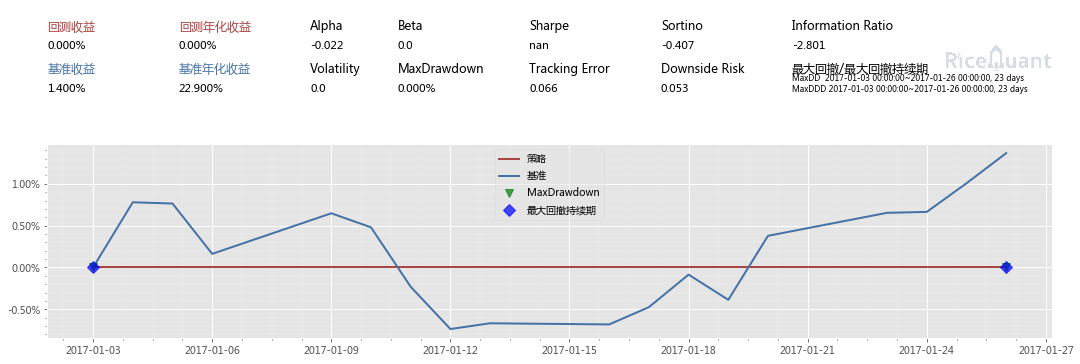

In [3]:
%rqalpha -s 20170101 -e 20170131 --config ../config.yml -f ./testStrategy.ipynb -p